In [1]:
import numpy as np

In [2]:
#given coordinates and direction, increment based on direction
#ignore boundaries
def go_to_next(a,b,d):
    result = {
        'right' : [0,1],
        'down':  [1,0],
        'left': [0, -1],
        'up': [-1, 0]
    }
    movement = result[direction[d]]
    a = a + movement[0]
    b = b + movement[1]
    return a,b
    
#given point & direction, return legal direction
def at_edge(a,b,d):
    try:
        a_next, b_next = go_to_next(a,b,d)

        #if a legal move and still zero, this is where to go next
        if my_matrix[a_next, b_next] == 0:
            return a_next, b_next, d
        #if legal move and non-zero, change direction and try again
        else:
            return at_edge(a,b, (d+1) % 4)
        
    #not a legal move (on the edge)
    except:
        return at_edge(a,b, (d+1) % 4)

In [3]:
#arbitrary starting matrix (global variables)
m = 30
n = 12

my_matrix = np.zeros(shape = (m,n))

direction = ['right', 'down', 'left', 'up']

In [4]:
#hey, let's not kill ourselves if this is wrong
cutoff = m * n + 1

#initialize
i = 0
m_i = 0
n_i = 0
d_i = 0

#this will always increment to show the trail
tracker = 1 

print('starting')
while (i < cutoff) & (my_matrix.min() == 0):

    #iterate our safety check
    i+=1
    
    #status check
    if i%m == 0:
        print(str(i) + 'th iteration')
    
    #convert current value
    my_matrix[m_i, n_i] = tracker
    tracker += 1
    
    #are we done?
    if my_matrix.min() > 0:
        print('finished')
        break
    
    #pick where to go next, 
    m_i, n_i, d_i = at_edge(m_i, n_i, d_i)

starting
30th iteration
60th iteration
90th iteration
120th iteration
150th iteration
180th iteration
210th iteration
240th iteration
270th iteration
300th iteration
330th iteration
360th iteration
finished


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

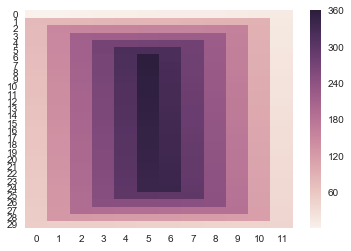

In [10]:
#visualize
sns.heatmap(my_matrix)